In [6]:
from time_series_expenses.prepare_data import monthly
expenses = monthly.copy(deep=True)
expenses.drop("ds", axis = 1, inplace=True)
expenses.head()

,y
Date,
2021-10-01,659.76
2021-11-01,840.82
2021-12-01,378.26
2022-01-01,825.94
2022-02-01,551.60


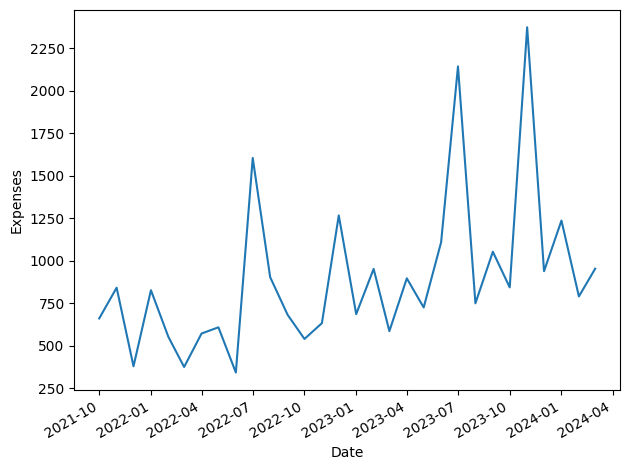

In [7]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

ax.plot(expenses.index, expenses.y)
ax.set_xlabel('Date')
ax.set_ylabel('Expenses')

fig.autofmt_xdate()
plt.tight_layout()


In [8]:
# Testing for stationarity
from statsmodels.tsa.seasonal import seasonal_decompose, STL
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller

ADF_result = adfuller(expenses.y)
print(f'ADF Statistic: {ADF_result[0]}')
print(f'p-value: {ADF_result[1]}')

ADF Statistic: -5.012447492548194
p-value: 2.0968112119230055e-05


JE stacionarno. Probati first difference

In [9]:
import pandas as pd
expenses["shift1"] = expenses.y.shift(1)
expenses["firstdiff"] = expenses.y - expenses.shift1
expenses

,y,shift1,firstdiff
Date,,,
2021-10-01,659.76,NaN,NaN
2021-11-01,840.82,659.76,181.06
2021-12-01,378.26,840.82,-462.56
2022-01-01,825.94,378.26,447.68
2022-02-01,551.60,825.94,-274.34
2022-03-01,374.27,551.60,-177.33
2022-04-01,571.23,374.27,196.96
2022-05-01,607.72,571.23,36.49
2022-06-01,341.75,607.72,-265.97


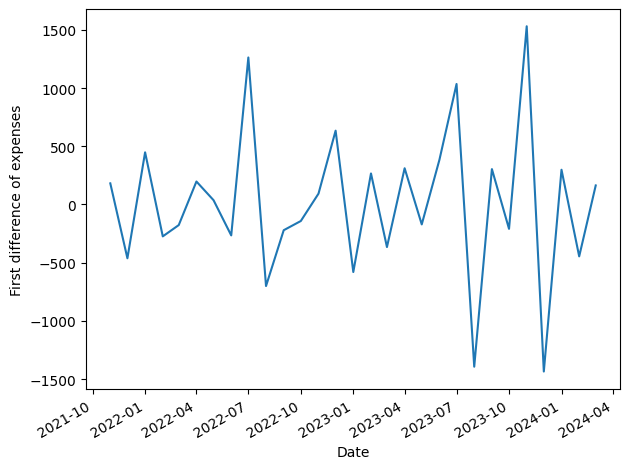

In [10]:
fig, ax = plt.subplots()

ax.plot(expenses.index, expenses["firstdiff"])
ax.set_xlabel('Date')
ax.set_ylabel('First difference of expenses')

fig.autofmt_xdate()
plt.tight_layout()


In [16]:
ADF_result = adfuller(expenses.firstdiff[1:])
print(f'ADF Statistic: {ADF_result[0]}')
print(f'p-value: {ADF_result[1]}')

# A prvi diff nije stacionaran

ADF Statistic: -2.0984270470702846
p-value: 0.24514756401907317
